---
title: Gaussian Process Regression
format: 
  html:
    code-fold: false
---

[![](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/aavelozb/aavelozb.github.io/blob/main/gp/gp01-regression.ipynb)

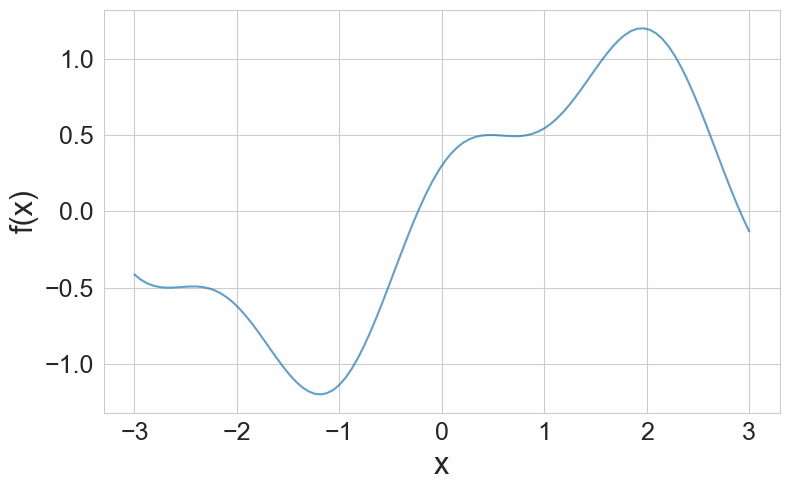

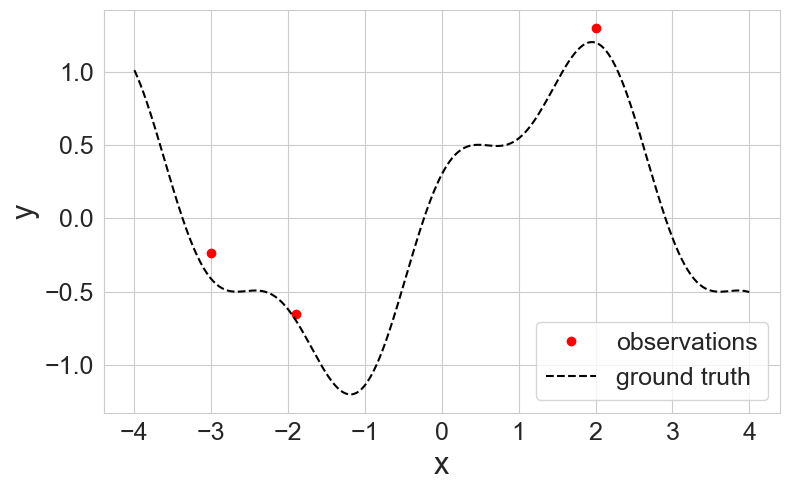

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel
import seaborn as sns
import os

plot_params = {'legend.fontsize': 18,
               'figure.figsize': (8, 5),
               'xtick.labelsize':'18',
               'ytick.labelsize':'18',
               'axes.titlesize':'24',
               'axes.labelsize':'22'}

plt.rcParams.update(plot_params)
sns.set_style("whitegrid")

def f(x):
    return np.sin(x) + 0.3 * np.cos(3 * x)
x = np.linspace(-3, 3, 100)

plt.figure()
plt.plot(x, f(x), alpha=0.7)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.tight_layout()

np.random.seed(0)

# training data
X_train = np.linspace(-3, 3, 12)[:, None]
X_train = np.array([-3, -1.9, 2])[:, None]
y_train = f(X_train[:, 0]) + 0.1 * np.random.randn(len(X_train))

# test grid
X_test = np.linspace(-4, 4, 400)[:, None]

plt.figure()
plt.plot(X_train[:, 0], y_train, 'or', label='observations')
plt.plot(X_test[:, 0], f(X_test[:, 0]), 'k--', label='ground truth')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()


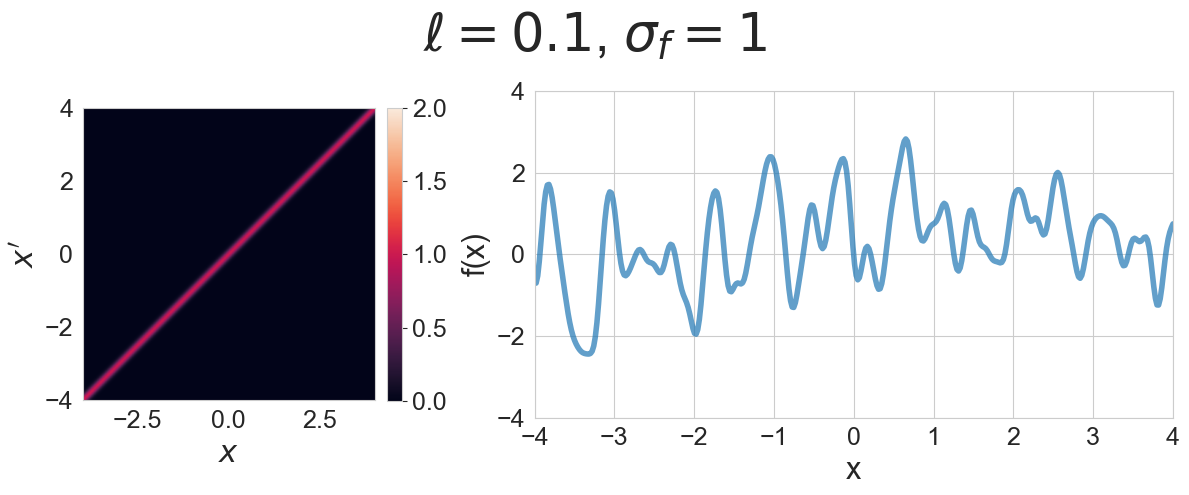

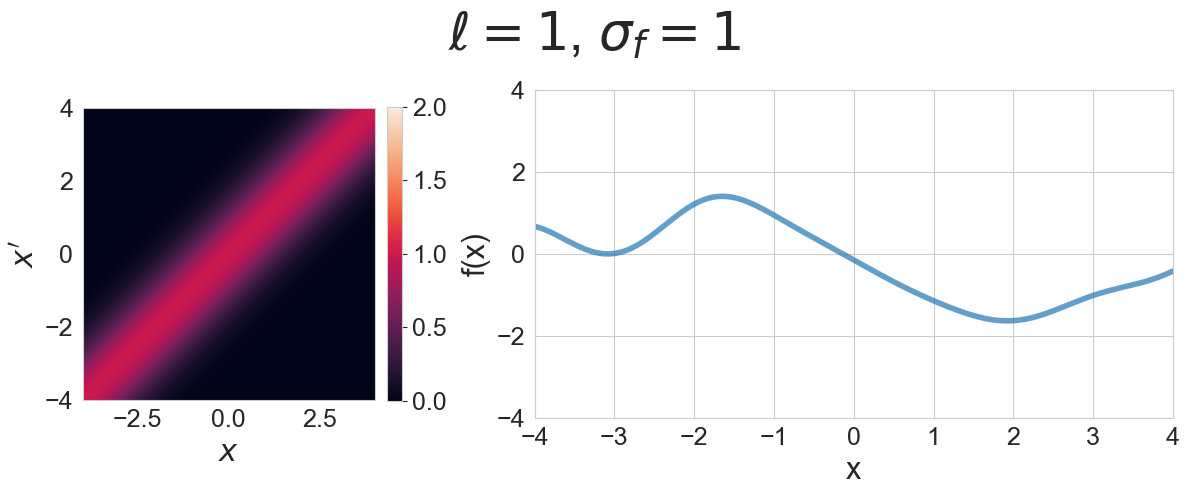

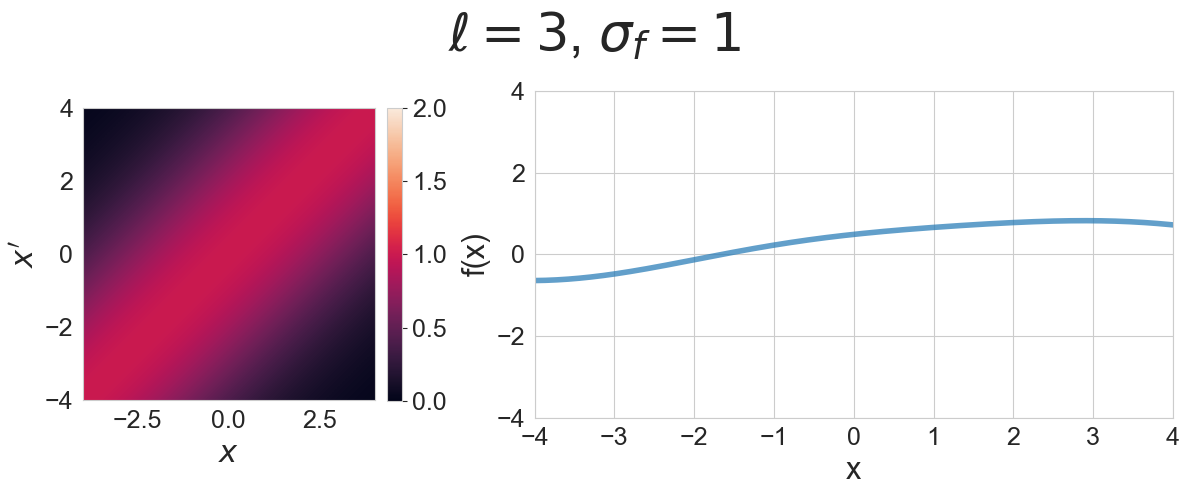

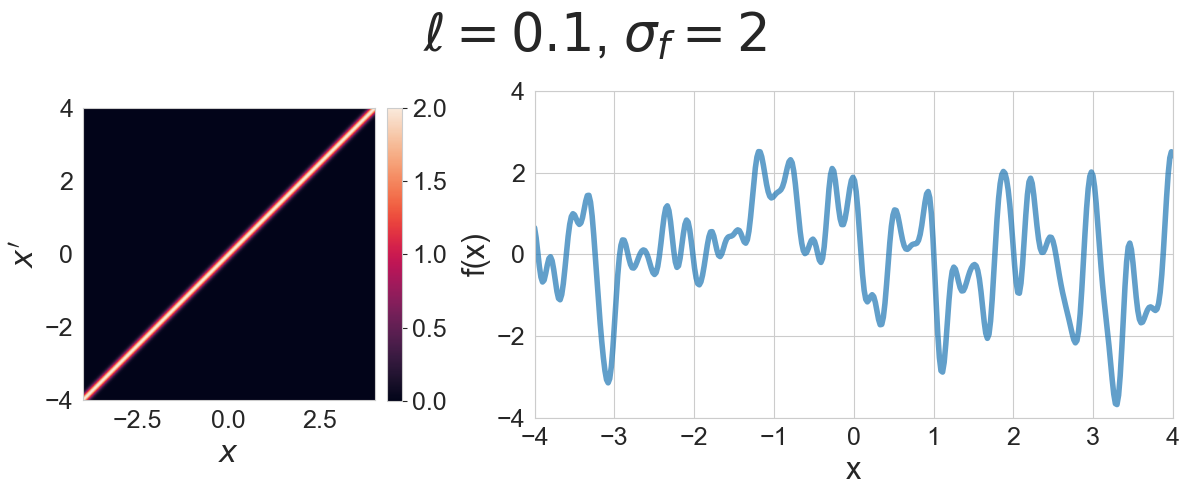

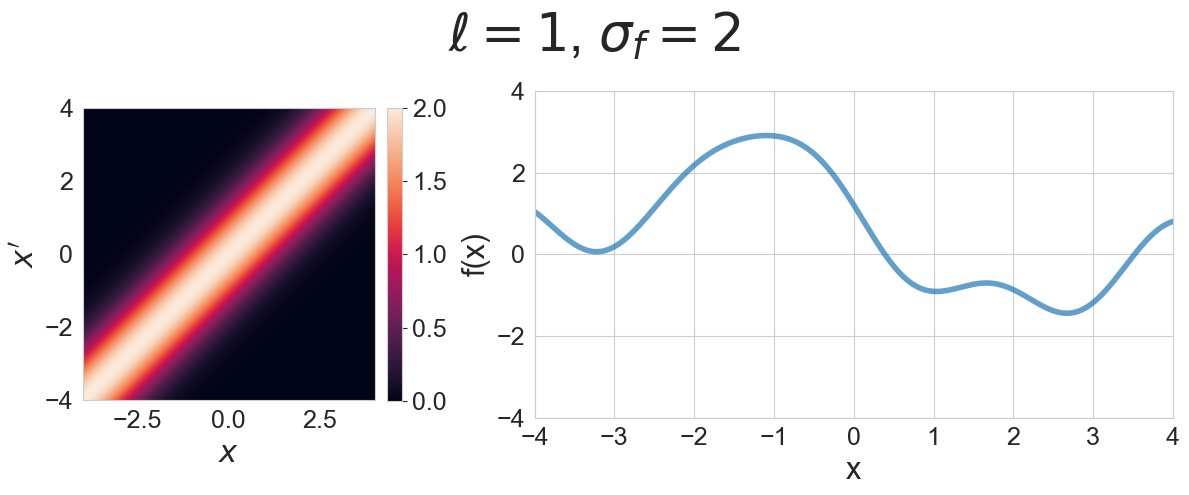

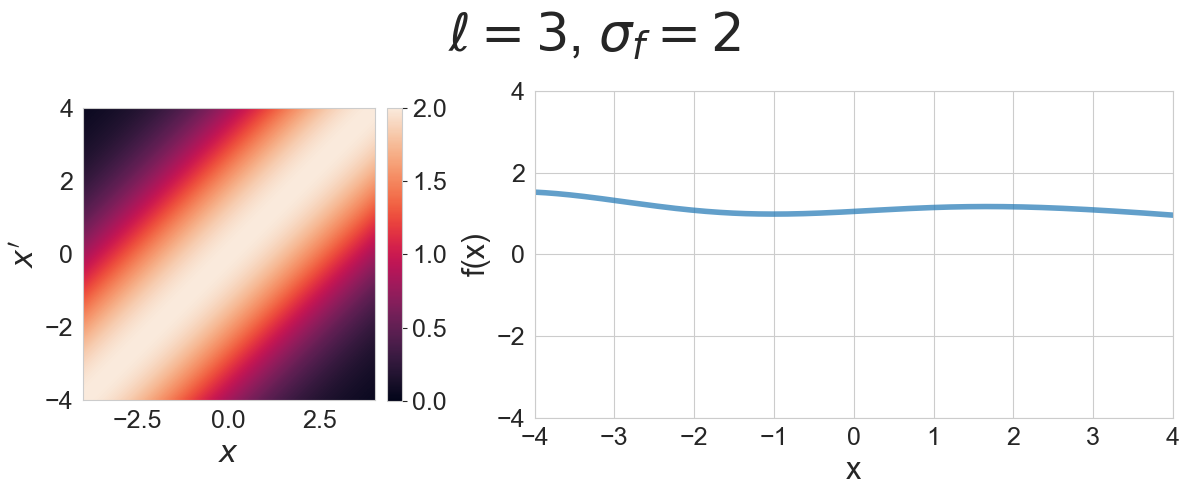

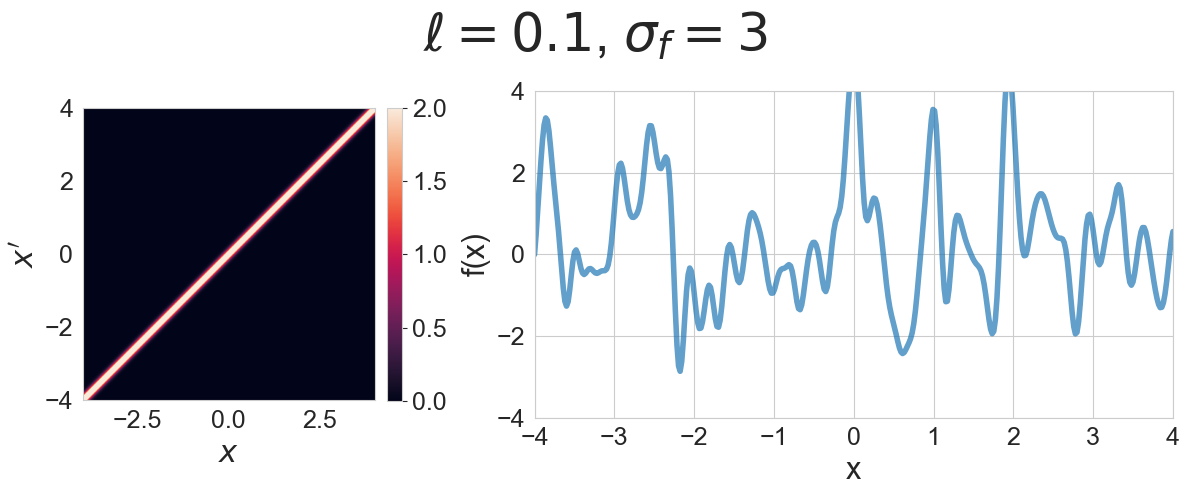

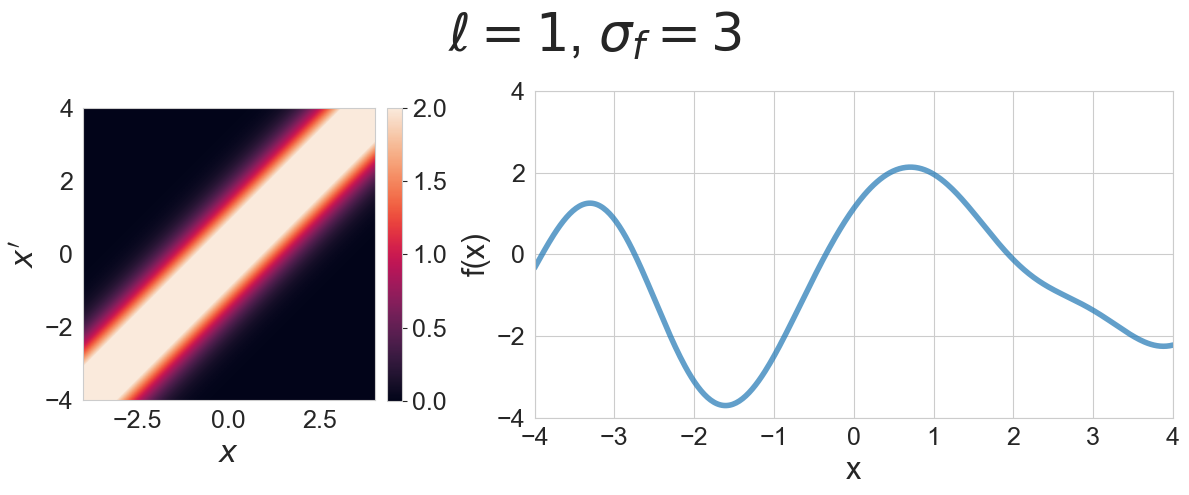

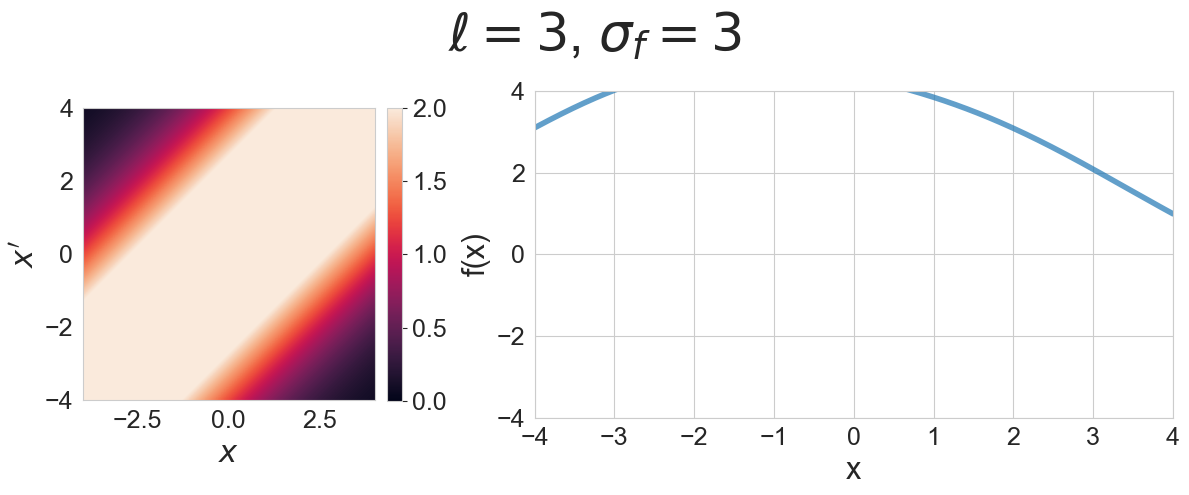

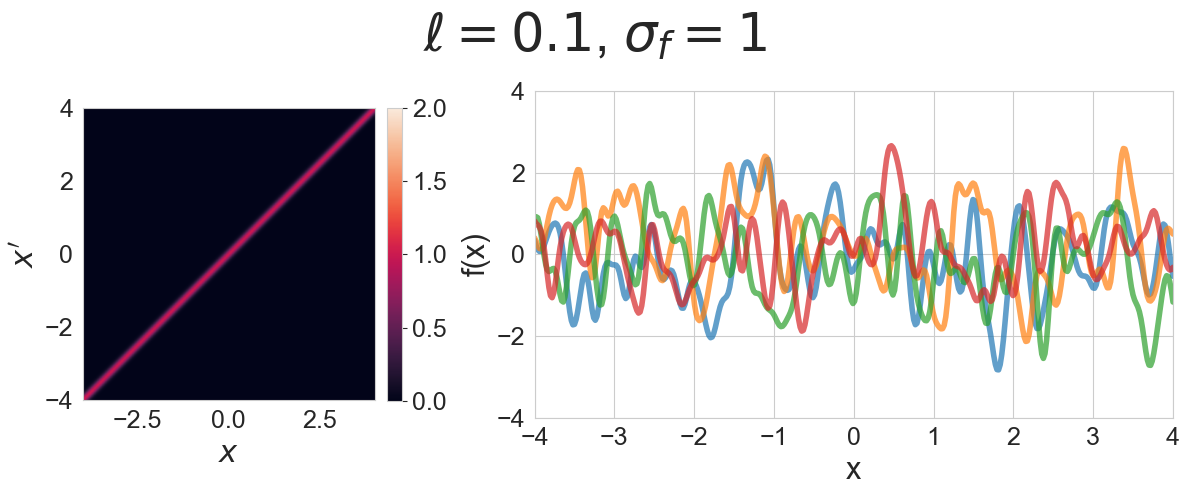

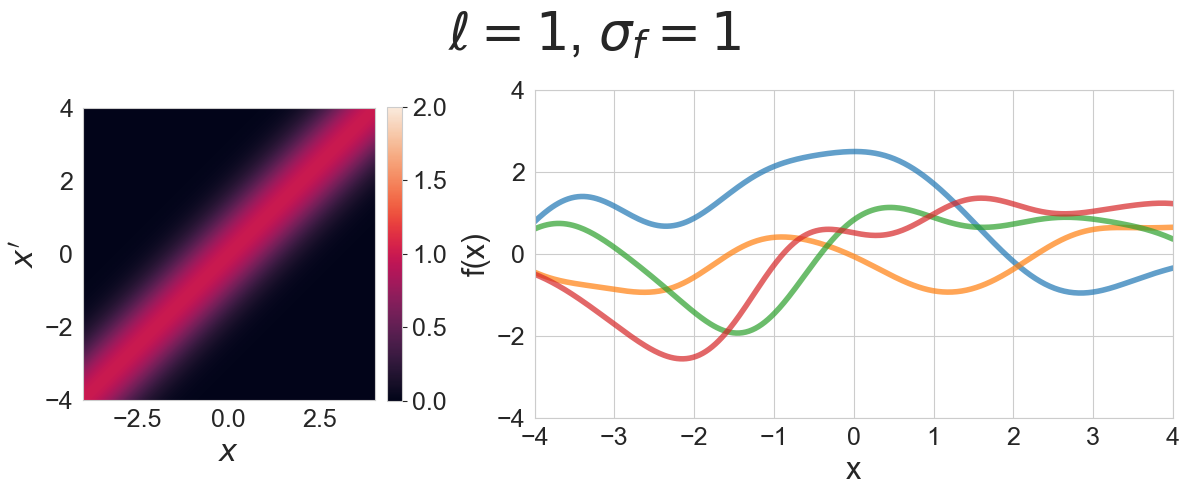

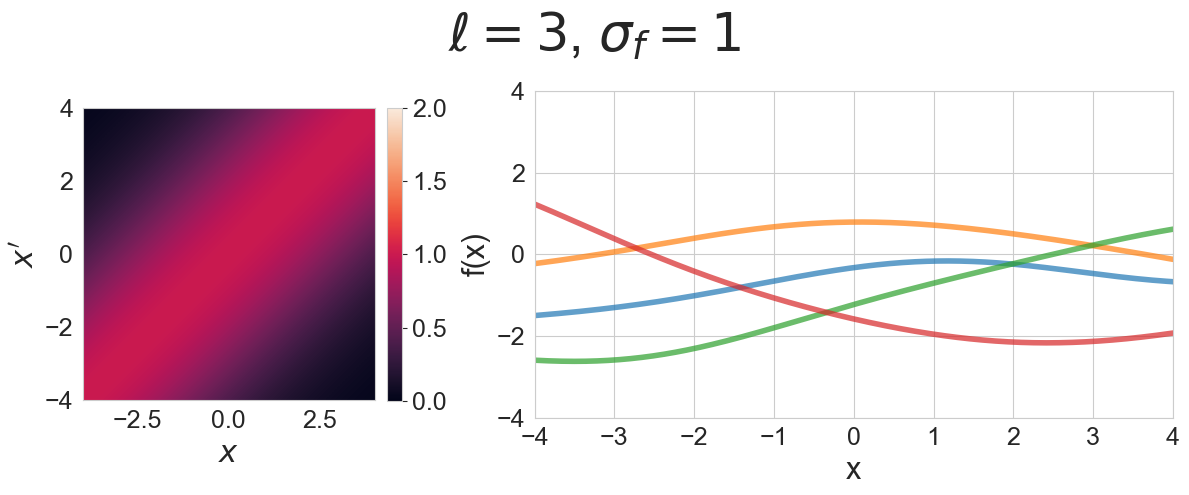

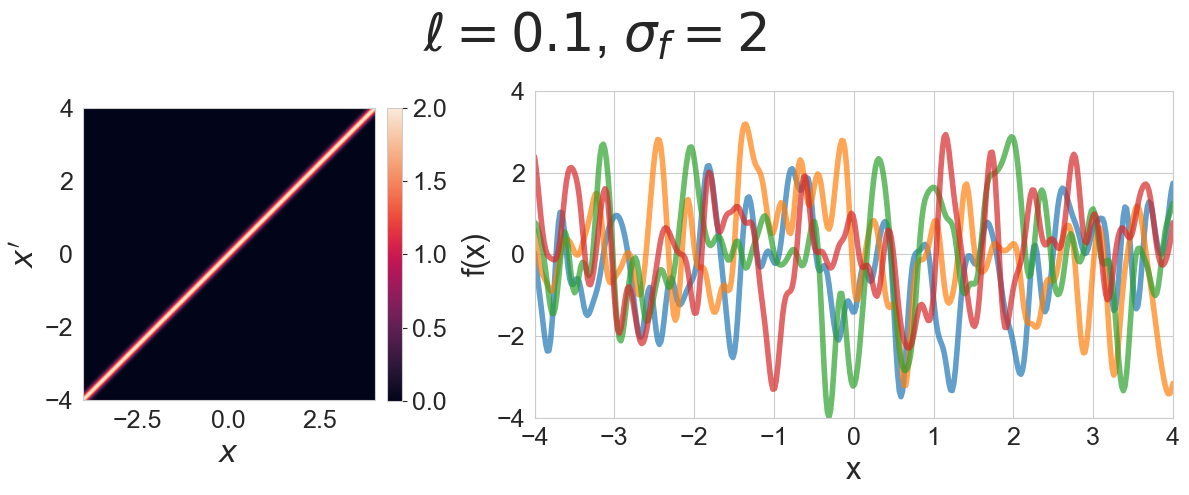

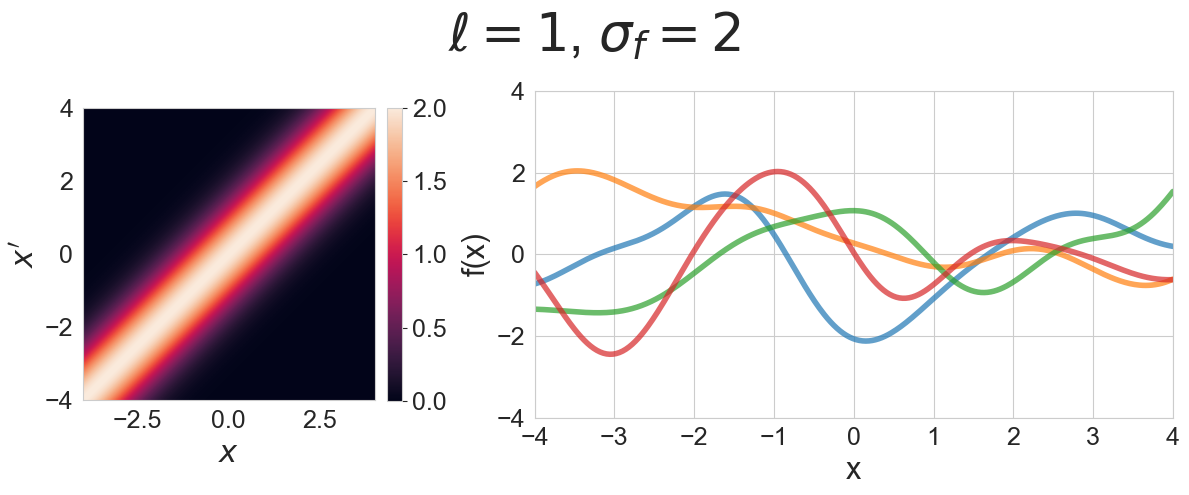

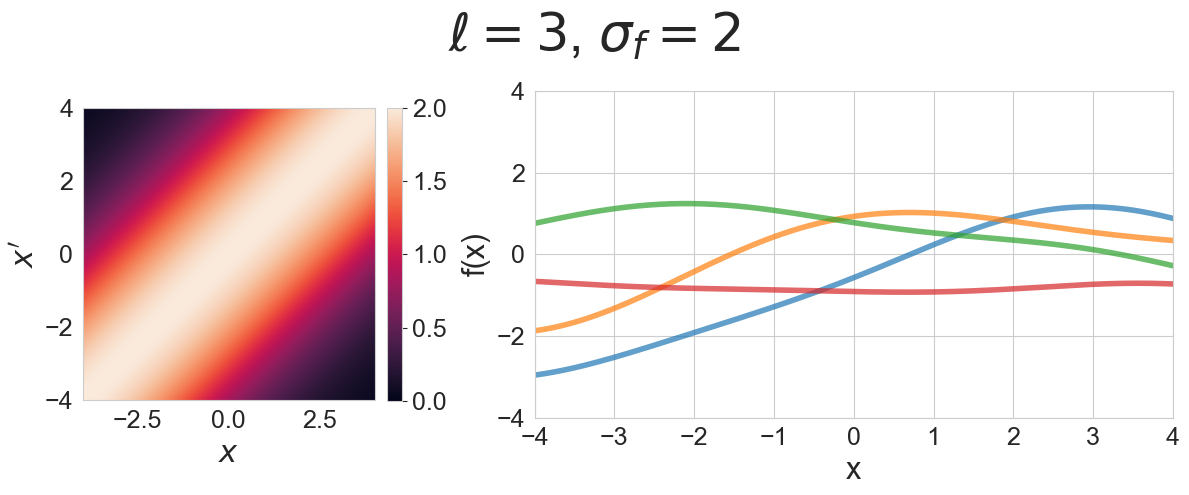

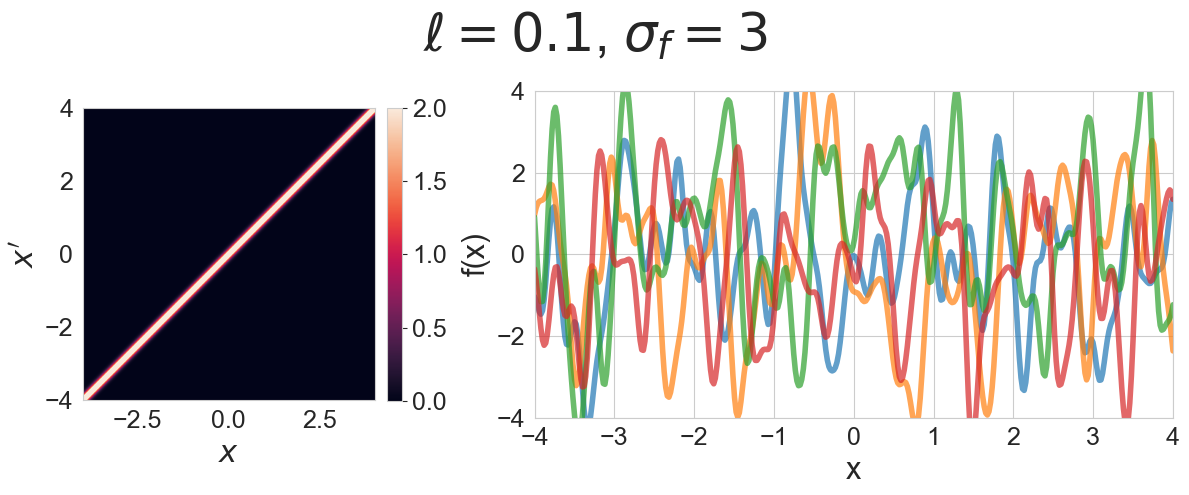

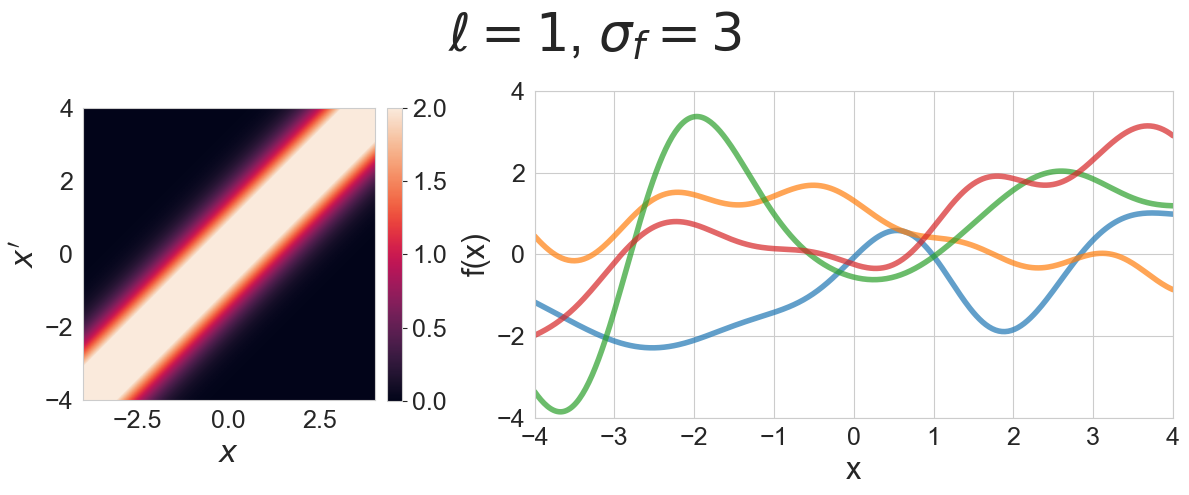

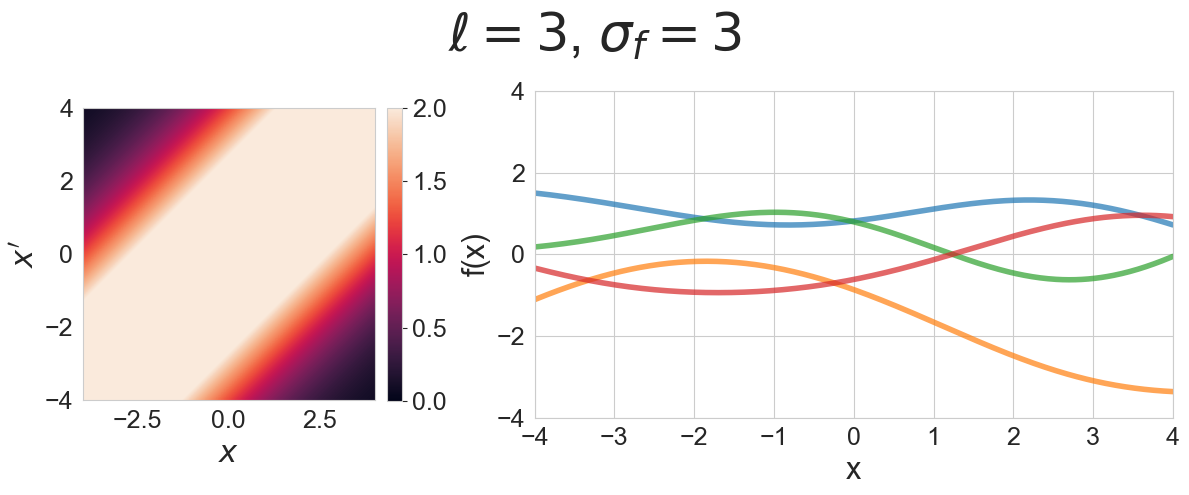

In [22]:

for n_samples in [1, 4]:
    idx_fig = 0
    for sigma_f in [1, 2, 3]:
        for length_scale in [0.1, 1, 3]:

            idx_fig+=1

            kernel = ConstantKernel(sigma_f, (1e-3, 1e3)) \
                        * RBF(length_scale=length_scale, length_scale_bounds=(1e-2, 1e2)) \
                        + WhiteKernel(noise_level=0.0, noise_level_bounds=(1e-10, 1e0))

            gp = GaussianProcessRegressor(
                kernel=kernel,
                alpha=0.0,
                optimizer=None,          # <- disables LML optimization / 'fmin_l_bfgs_b'
                n_restarts_optimizer=5,
                normalize_y=False)

            # Prior mean/cov on test grid
            mu_prior, cov_prior = gp.predict(X_test, return_cov=True)
            # Draw prior samples
            prior_samps = np.random.multivariate_normal(mean=mu_prior.ravel(), cov=cov_prior, size=n_samples)

            plt.close('all')
            fig, axs = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [1, 2]})
            axs = axs.flatten()

            # Left: covariance matrix
            im = axs[0].imshow(cov_prior, origin="lower", extent=[-4, 4, -4, 4], vmin=0.0, vmax=2.0)
            axs[0].set_xlabel(r'$x$')
            axs[0].set_ylabel(r"$x^\prime$")
            axs[0].grid(False)
            axs[0].set_xlim([-4, 4])
            axs[0].set_ylim([-4, 4])
            fig.colorbar(im, ax=axs[0], fraction=0.046, pad=0.04)

            # Right: prior samples
            for i in range(n_samples):
                axs[1].plot(X_test[:, 0], prior_samps[i], alpha=0.7, lw=4)
            axs[1].set_xlabel('x')
            axs[1].set_ylabel('f(x)')
            axs[1].set_xlim([-4, 4])
            axs[1].set_ylim([-4, 4])

            plt.suptitle(f'$\ell={length_scale}$, $\sigma_f={sigma_f}$', fontsize=38)
            plt.tight_layout()
            # plt.savefig(os.path.join('.',f'fig-prior-rbf-nsamp{n_samples}-{idx_fig}.pdf'))
            plt.show()



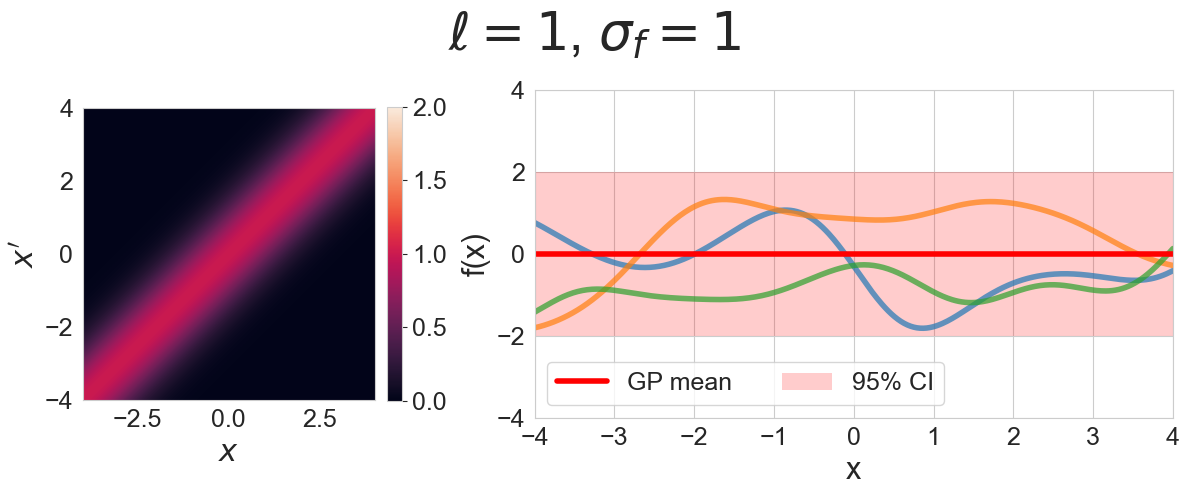

In [23]:
length_scale = 1
sigma_f = 1

kernel = ConstantKernel(sigma_f, (1e-3, 1e3)) \
        * RBF(length_scale=length_scale, length_scale_bounds=(1e-2, 1e2)) \
        + WhiteKernel(noise_level=0.0, noise_level_bounds=(1e-10, 1e0))

gp = GaussianProcessRegressor(
    kernel=kernel,
    alpha=0.0,
    optimizer=None,          # <- disables LML optimization / 'fmin_l_bfgs_b'
    n_restarts_optimizer=5,
    normalize_y=False)

# Prior mean/cov on test grid
mu_prior, cov_prior = gp.predict(X_test, return_cov=True)
std_prior = np.sqrt(np.diag(cov_prior))
n_samples = 3
# Draw prior samples
prior_samps = np.random.multivariate_normal(mean=mu_prior.ravel(), cov=cov_prior, size=n_samples)


plt.close('all')
fig, axs = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [1, 2]})
axs = axs.flatten()

# Left: covariance matrix
im = axs[0].imshow(cov_prior, origin="lower", extent=[-4, 4, -4, 4], vmin=0.0, vmax=2.0)
axs[0].set_xlabel(r'$x$')
axs[0].set_ylabel(r"$x^\prime$")
axs[0].grid(False)
axs[0].set_xlim([-4, 4])
axs[0].set_ylim([-4, 4])
fig.colorbar(im, ax=axs[0], fraction=0.046, pad=0.04)

# Right: prior samples
for i in range(n_samples):
    axs[1].plot(X_test[:, 0], prior_samps[i], alpha=0.7, lw=4)
axs[1].set_xlabel('x')
axs[1].set_ylabel('f(x)')
axs[1].set_xlim([-4, 4])
axs[1].set_ylim([-4, 4])

plt.suptitle(f'$\ell={length_scale}$, $\sigma_f={sigma_f}$', fontsize=38)
plt.tight_layout()
# plt.savefig(os.path.join('.',f'fig-prior-rbf-with-moments.pdf'))

# Right: prior samples
axs[1].plot(X_test[:, 0], mu_prior, 'r', label='GP mean', lw=4)
axs[1].fill_between(
    X_test[:, 0],
    mu_prior - 2 * std_prior,
    mu_prior + 2 * std_prior,
    color='r',
    alpha=0.2,
    linewidth=0,
    edgecolor='none',
    label='95% CI')
axs[1].legend(loc="lower left", ncols=2)
# plt.savefig(os.path.join('.',f'fig-prior-rbf-with-moments-2.pdf'))

plt.show()


/Users/aveloz/miniconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:307: RuntimeWarning: divide by zero encountered in log
  return np.log(np.hstack(theta))


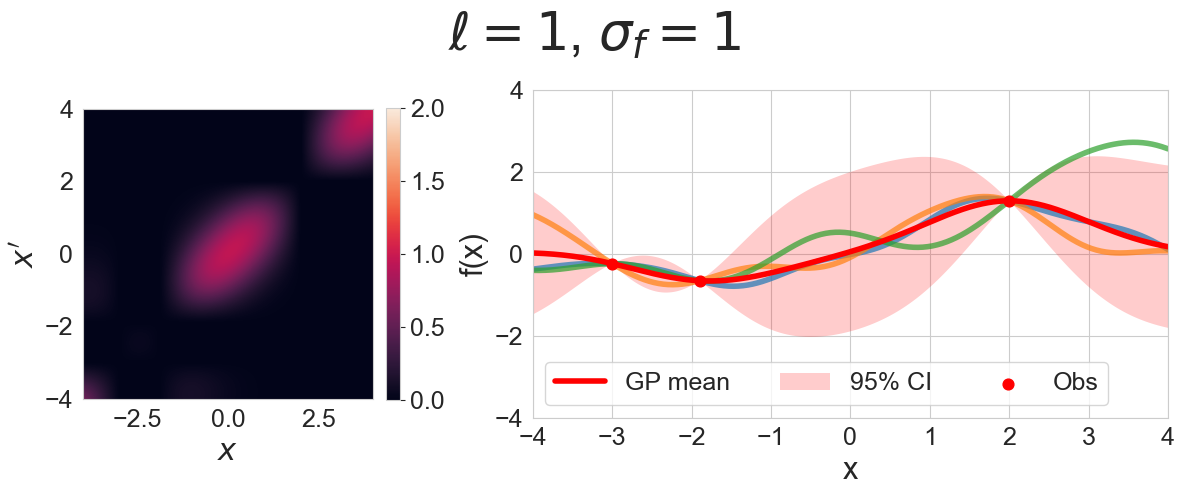

In [24]:

gp.fit(X_train, y_train)
# Posterior mean/cov on test grid
mu, cov = gp.predict(X_test, return_cov=True)

n_samples = 3
# Draw posterior samples
post_samps = np.random.multivariate_normal(mean=mu.ravel(), cov=cov, size=n_samples)
std = np.sqrt(np.diag(cov))


plt.close('all')
fig, axs = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [1, 2]})
axs = axs.flatten()

# Left: covariance matrix
im = axs[0].imshow(cov, origin="lower", extent=[-4, 4, -4, 4], vmin=0.0, vmax=2.0)
axs[0].set_xlabel(r'$x$')
axs[0].set_ylabel(r"$x^\prime$")
axs[0].grid(False)
axs[0].set_xlim([-4, 4])
axs[0].set_ylim([-4, 4])
fig.colorbar(im, ax=axs[0], fraction=0.046, pad=0.04)

# Right: prior samples
for i in range(n_samples):
    axs[1].plot(X_test[:, 0], post_samps[i], alpha=0.7, lw=4)
axs[1].set_xlabel('x')
axs[1].set_ylabel('f(x)')
axs[1].set_xlim([-4, 4])
axs[1].set_ylim([-4, 4])
axs[1].plot(X_test[:, 0], mu, 'r', label='GP mean', lw=4)
axs[1].fill_between(
    X_test[:, 0],
    mu - 2 * std,
    mu + 2 * std,
    color='r',
    alpha=0.2,
    linewidth=0,
    edgecolor='none',
    label='95% CI')
axs[1].scatter(np.squeeze(X_train), y_train, color="red", zorder=10, s=60, label="Obs")
axs[1].legend(loc="lower left", ncols=3)


plt.suptitle(f'$\ell={length_scale}$, $\sigma_f={sigma_f}$', fontsize=38)
plt.tight_layout()
# plt.savefig(os.path.join('.',f'fig-post-rbf-with-moments.pdf'))
plt.show()





# Illustration of prior and posterior Gaussian process for different kernels

In [25]:
import matplotlib.pyplot as plt
import numpy as np


def plot_gpr_samples(gpr_model, n_samples, ax):
    x = np.linspace(0, 5, 100)
    X = x.reshape(-1, 1)

    y_mean, y_std = gpr_model.predict(X, return_std=True)
    y_samples = gpr_model.sample_y(X, n_samples)

    for idx, single_prior in enumerate(y_samples.T):
        ax.plot(x, single_prior, color="black", alpha=0.7, label=f"Sampled function") 
    ax.plot(x, y_mean, color="orange", label="Mean")
    ax.fill_between(x, y_mean - 2*y_std, y_mean + 2*y_std, alpha=0.5, color="orange", label=r"$\pm$ 2 std. dev.")


## Dataset and Gaussian process generation
We will create a training dataset that we will use in the different sections.



In [26]:
rng = np.random.RandomState(5)
X_train = rng.uniform(0, 5, 10).reshape(-1, 1)
y_train = np.sin((X_train[:, 0] - 2.5) ** 2)
n_samples = 5
X_train

array([[1.10996586],
       [4.35366153],
       [1.03359578],
       [4.59305454],
       [2.44205594],
       [3.05871931],
       [3.82953928],
       [2.59208994],
       [1.48400251],
       [0.93860614]])

### Radial Basis Function kernel


/Users/aveloz/miniconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.1. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/aveloz/miniconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.1. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


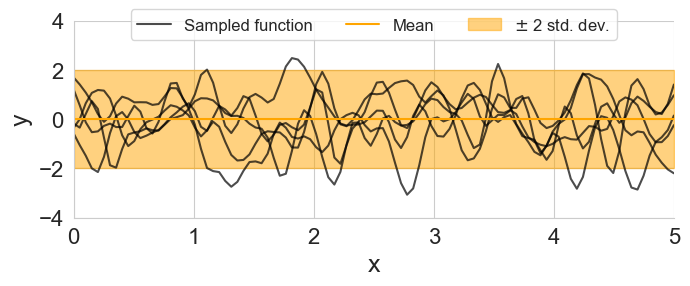

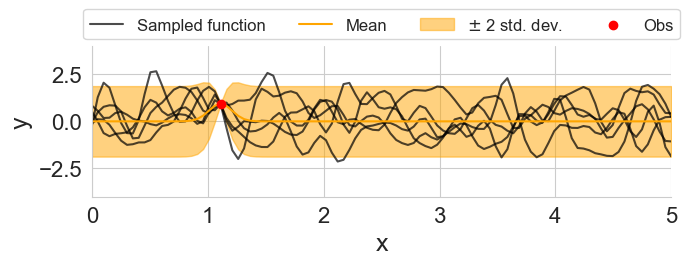

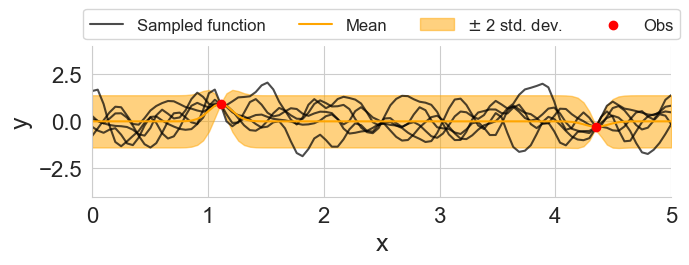

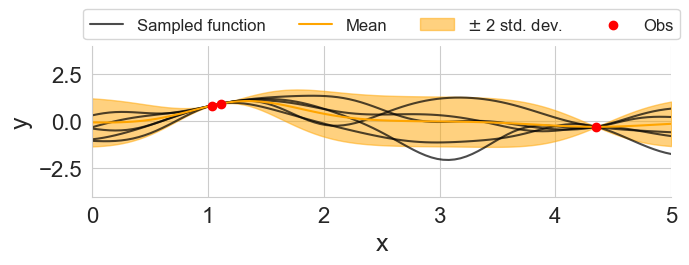

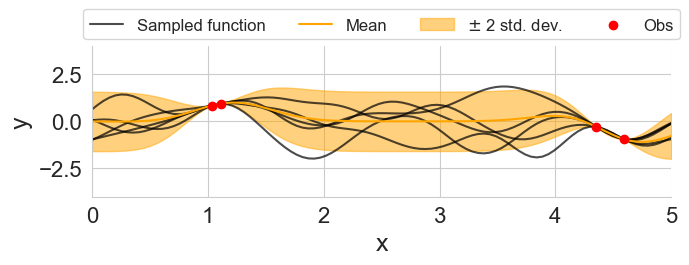

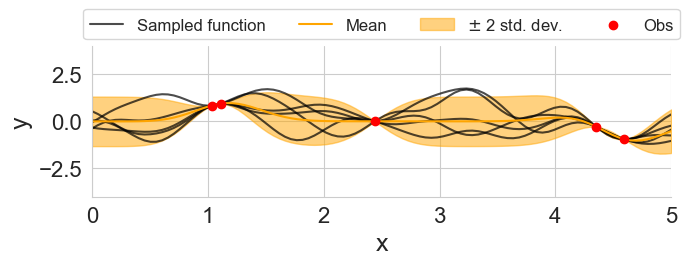

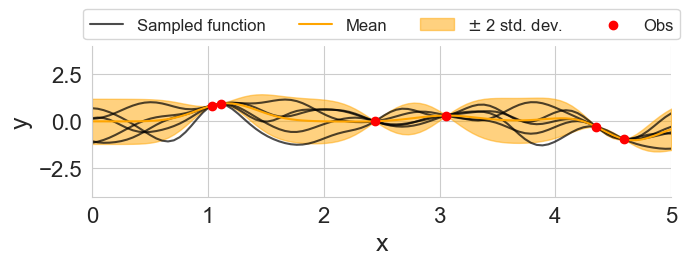

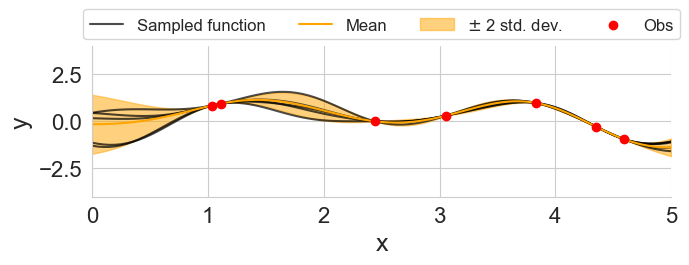

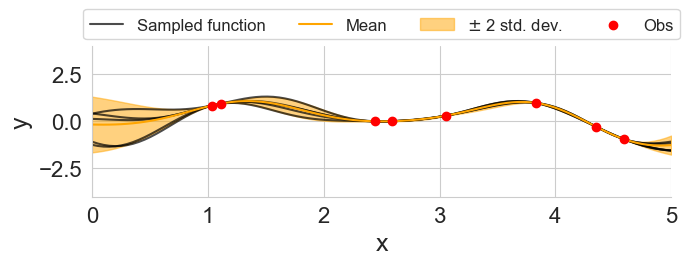

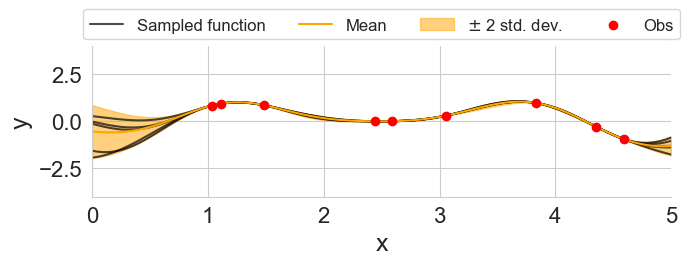

In [27]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = 1.0 * RBF(length_scale=0.1, length_scale_bounds=(1e-1, 10.0))
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

fig, ax = plt.subplots(nrows=1, sharex=True, sharey=True, figsize=(7, 3))
# plot prior
plot_gpr_samples(gpr, n_samples=n_samples, ax=ax)
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc="upper center", bbox_to_anchor=(0.5, 1.1), ncol=len(by_label), fontsize=12)
ax.set_xlim([0, 5])
ax.set_ylim([-4, 4])
ax.set_xlabel("x", fontsize=18)
ax.set_ylabel("y", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
# plt.savefig(f'rbf-0.pdf')

for idx in range(X_train.shape[0]):
    fig, ax = plt.subplots(nrows=1, sharex=True, sharey=True, figsize=(7, 3))
    x_train_ = np.array(X_train[:idx+1, 0]).reshape(-1, 1)
    y_train_ = np.array(y_train[:idx+1]).reshape(-1, 1)
    gpr.fit(x_train_, y_train_)
    # plot posterior
    plot_gpr_samples(gpr, n_samples=n_samples, ax=ax)
    ax.scatter(np.squeeze(x_train_), y_train_, color="red", zorder=10, label="Obs")
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc="upper center", bbox_to_anchor=(0.5, 1.3), ncol=len(by_label), fontsize=12)
    ax.set_xlim([0, 5])
    ax.set_ylim([-4, 4])
    ax.set_xlabel("x", fontsize=18)
    ax.set_ylabel("y", fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()
    # plt.savefig(f'rbf-{idx+1}.pdf')

plt.close(fig)

In [28]:
X_train.shape

(10, 1)

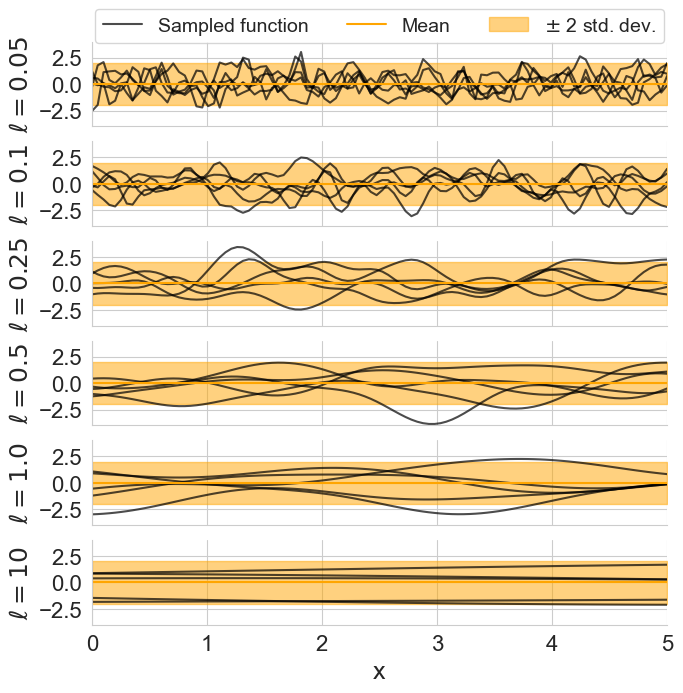

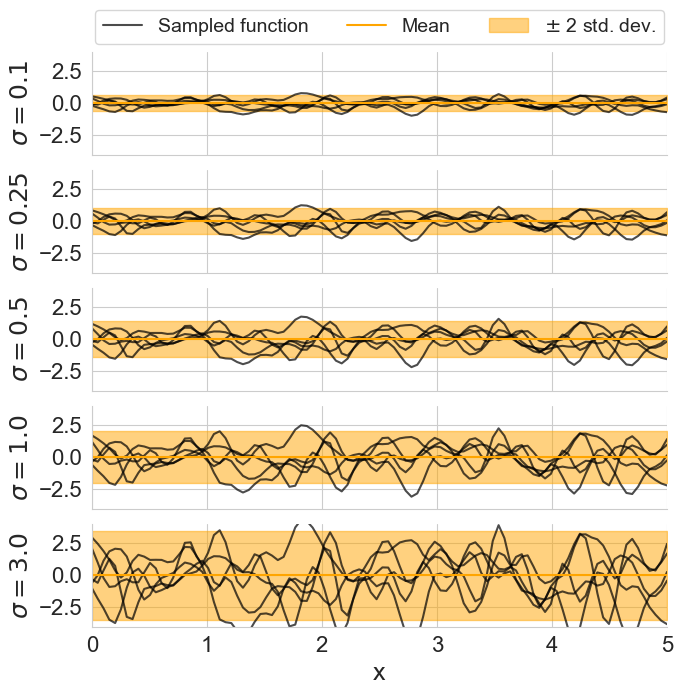

In [29]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

length_scales = [0.05, 0.1, 0.25, 0.5, 1.0, 10]
fig, ax = plt.subplots(nrows=len(length_scales), sharex=True, sharey=True, figsize=(7, 7))
for i, ls in enumerate(length_scales):
    kernel = 1.0 * RBF(length_scale=ls, length_scale_bounds=(1e-1, 10.0)) 
    gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)
    plot_gpr_samples(gpr, n_samples=n_samples, ax=ax[i]) # plot prior
    if i==0:
        handles, labels = ax[i].get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        ax[i].legend(by_label.values(), by_label.keys(), loc="upper center", bbox_to_anchor=(0.5, 1.5), ncol=len(by_label), fontsize=14)
    ax[i].set_xlim([0, 5])
    ax[i].set_ylim([-4, 4])
    ax[i].tick_params(axis='both', which='major', labelsize=16)
    ax[i].set_ylabel(f"$\ell = {ls}$", fontsize=18)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    if i == len(length_scales)-1:
        ax[i].set_xlabel("x", fontsize=18)
plt.tight_layout()
# plt.savefig(f'rbf-panel-length-scales.pdf')


sigmas = [0.1, 0.25, 0.5, 1.0, 3.0]
fig, ax = plt.subplots(nrows=len(sigmas), sharex=True, sharey=True, figsize=(7, 7))
for i, sigma in enumerate(sigmas):
    ls = 0.1
    kernel = sigma * RBF(length_scale=ls, length_scale_bounds=(1e-1, 10.0))  # [web:4]
    gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)
    plot_gpr_samples(gpr, n_samples=n_samples, ax=ax[i]) # plot prior
    if i==0:
        handles, labels = ax[i].get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        ax[i].legend(by_label.values(), by_label.keys(), loc="upper center", bbox_to_anchor=(0.5, 1.5), ncol=len(by_label), fontsize=14)
    ax[i].set_xlim([0, 5])
    ax[i].set_ylim([-4, 4])
    ax[i].tick_params(axis='both', which='major', labelsize=16)
    ax[i].set_ylabel(f"$\sigma = {sigma}$", fontsize=18)
    # ax[i].set_title(f"$\ell = {ls}$", fontsize=18)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    if i == len(sigmas)-1:
        ax[i].set_xlabel("x", fontsize=18)
plt.tight_layout()
# plt.savefig(f'rbf-panel-sigmas.pdf')


/Users/aveloz/miniconda3/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:478: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(
/Users/aveloz/miniconda3/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:523: RuntimeWarning: covariance is not positive-semidefinite.
  y_samples = rng.multivariate_normal(y_mean, y_cov, n_samples).T
/Users/aveloz/miniconda3/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


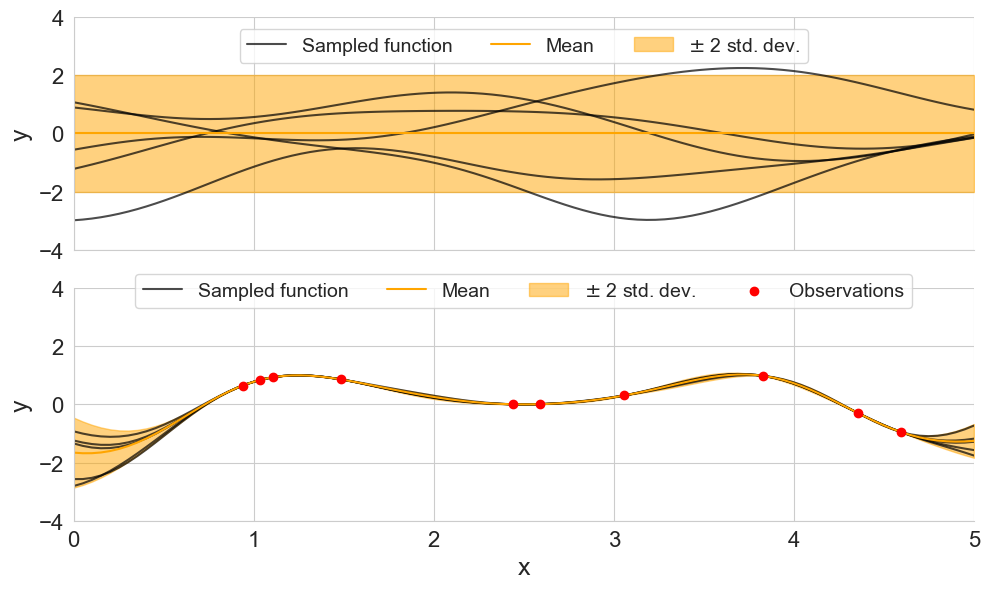

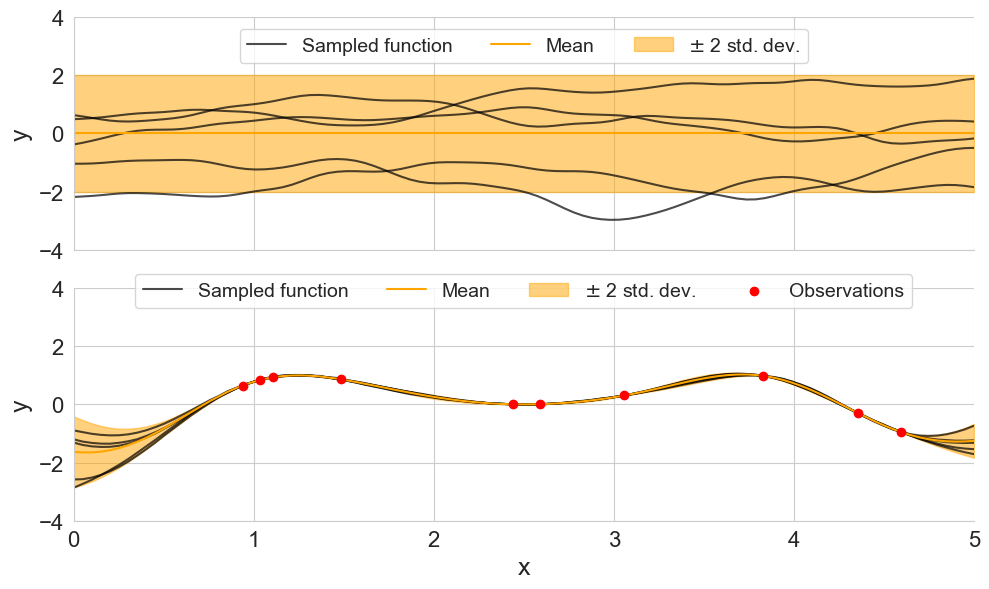

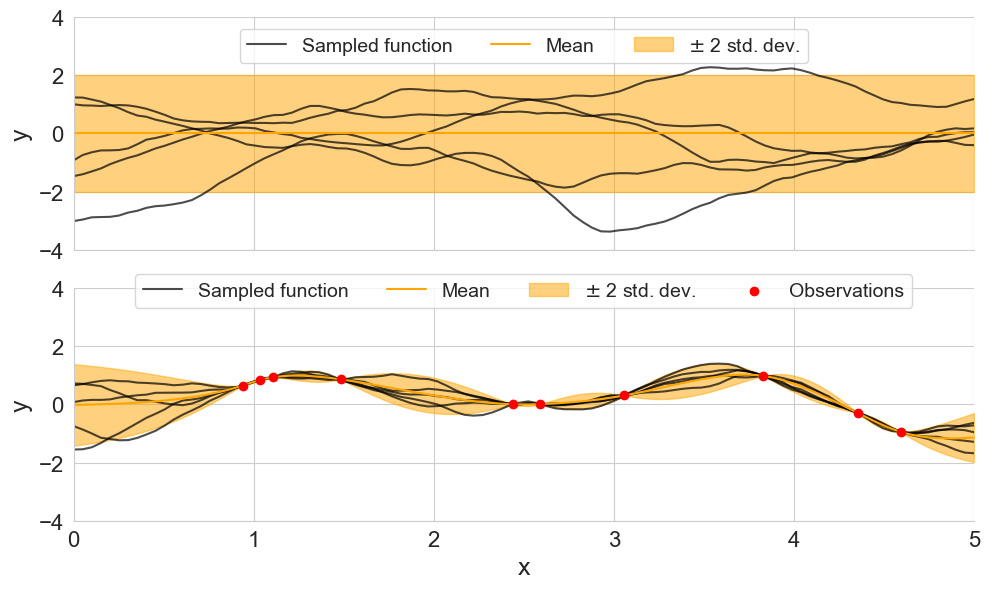

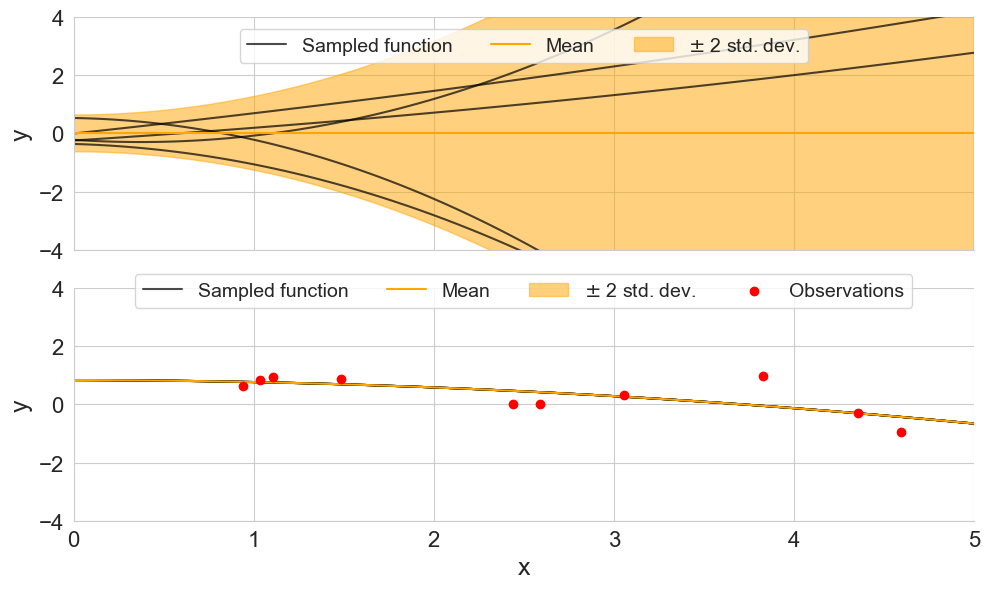

In [30]:
# Rational Quadratic kernel
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, RationalQuadratic, Matern, ExpSineSquared, ConstantKernel, DotProduct

kernels = [(1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)), 'kernel-rbf.pdf'),
            (1.0 * RationalQuadratic(length_scale=1.0, alpha=0.1, alpha_bounds=(1e-5, 1e15)), 'kernel-rationalquadratic.pdf'),
            (1.0 * Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0), nu=1.5), 'kernel-matern.pdf'),
            # (1.0 * ExpSineSquared(length_scale=1.0, periodicity=3.0, length_scale_bounds=(0.1, 10.0), periodicity_bounds=(1.0, 10.0)), 'kernel-expsinesquared.pdf'),
            (ConstantKernel(0.1, (0.01, 10.0)) * (DotProduct(sigma_0=1.0, sigma_0_bounds=(0.1, 10.0)) ** 2), 'kernel-cte-dot.pdf')
            ]


for kernel, filename in kernels:

    gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

    fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(10, 6))
    # plot prior
    plot_gpr_samples(gpr, n_samples=n_samples, ax=ax[0])
    handles, labels = ax[0].get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax[0].legend(by_label.values(), by_label.keys(), loc="upper center", bbox_to_anchor=(0.5, 0.99), ncol=len(by_label), fontsize=14)
    ax[0].set_xlim([0, 5])
    ax[0].set_ylim([-4, 4])
    # ax[0].set_xlabel("x", fontsize=18)
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
    ax[0].set_ylabel("y", fontsize=18)
    ax[0].tick_params(axis='both', which='major', labelsize=16)

    x_train_ = np.array(X_train[:, 0]).reshape(-1, 1)
    y_train_ = np.array(y_train[:]).reshape(-1, 1)
    gpr.fit(x_train_, y_train_)
    # plot posterior
    plot_gpr_samples(gpr, n_samples=n_samples, ax=ax[1])
    ax[1].scatter(np.squeeze(x_train_), y_train_, color="red", zorder=10, label="Observations")
    handles, labels = ax[1].get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax[1].legend(by_label.values(), by_label.keys(), loc="upper center", bbox_to_anchor=(0.5, 1.1), ncol=len(by_label), fontsize=14)
    ax[1].set_xlim([0, 5])
    ax[1].set_ylim([-4, 4])
    ax[1].set_xlabel("x", fontsize=18)
    ax[1].set_ylabel("y", fontsize=18)
    ax[1].tick_params(axis='both', which='major', labelsize=16)
    # ax.set_title("Samples from posterior distribution (RBF kernel)", fontsize=18)
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)

    plt.tight_layout()
    # plt.savefig(filename)

